In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import HUXt as H
import astropy.units as u
import h5py
%matplotlib inline

In [5]:
vb, cme,cone_model = H.load_cone_cme_run('C:\\Users\\yq904481\\PycharmProjects\\HUXt\\data\\HUXt2DCME_test2.hdf5')
#f = h5py.File('C:\\Users\\yq904481\\PycharmProjects\\HUXt\\data\\HUXt2DCME_test.hdf5', 'r')

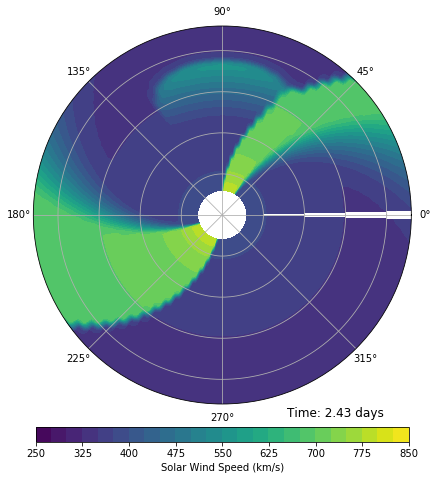

In [17]:
tag = 'test_run'
fig, ax = cone_model.plot_frame(100)

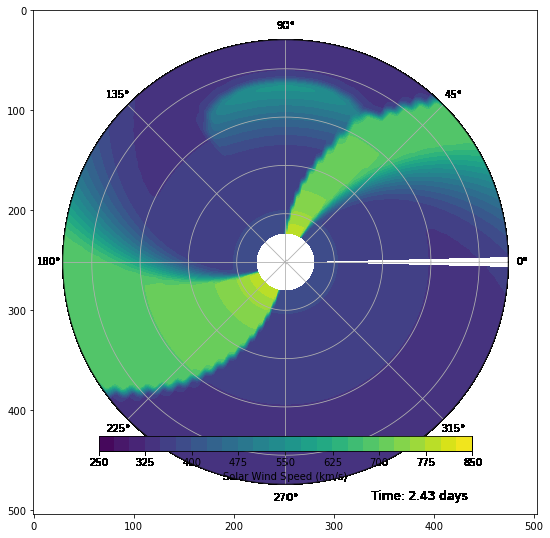

In [18]:
fig.tight_layout()
frame = mplfig_to_npimage(fig)
fig2, ax2 = plt.subplots(figsize=(7,7))
ax2.imshow(frame)
ax2.set_position((0,0,1,1))

In [7]:
cone_model.animate_plot(tag)

Moviepy - Building video C:\Users\yq904481\PycharmProjects\HUXt\figures\HUXt2DCME_test_run_movie.mp4.
Moviepy - Writing video C:\Users\yq904481\PycharmProjects\HUXt\figures\HUXt2DCME_test_run_movie.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\yq904481\PycharmProjects\HUXt\figures\HUXt2DCME_test_run_movie.mp4
